## 2018-01-22 Solow Growth Model: Computations

## Setting up the environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll...

In [3]:
%matplotlib inline 

In [4]:
# graphics setup: seaborn-whitegrid and figure size...
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 7
plt.rcParams["figure.figsize"] = figure_size

Let's start the economy in some random, arbitary position, let it develop over time according to its behavioral relationships, and see what happens:

In [5]:
# libraries...

import numpy as np
import pandas as pd

In [6]:
# initialize the dataframe...

sg_df = pd.DataFrame(index=range(200),columns=['Labor', 
    'Efficiency',
    'Capital',
    'Output',
    'Output_per_Worker',
    'Capital_Output_Ratio'],
    dtype='float')

In [7]:
# parameter values: labor-force growth rate, efficiency-of-labor growth rate,
# depreciation rate on the capital stock, savings-investment share of output,
# and capital share in production α...

n = 0.0
g = 0.0
delta = 0.03
s = 0.15
alpha = 0.5

In [8]:
# initial conditions: labor force, efficiency-of-labor, and capital stock:

L0 = 1000
E0 = 1
K0 = 5000

sg_df.Labor[0] = L0 = 1000
sg_df.Efficiency[0] = E0
sg_df.Capital[0] = K0
sg_df.Output[0] = (sg_df.Capital[0]**alpha *
    (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

In [9]:
# Loop it forward

for i in range(200):
    sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
    sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
    sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
    sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha *
        (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
    sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
    sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]

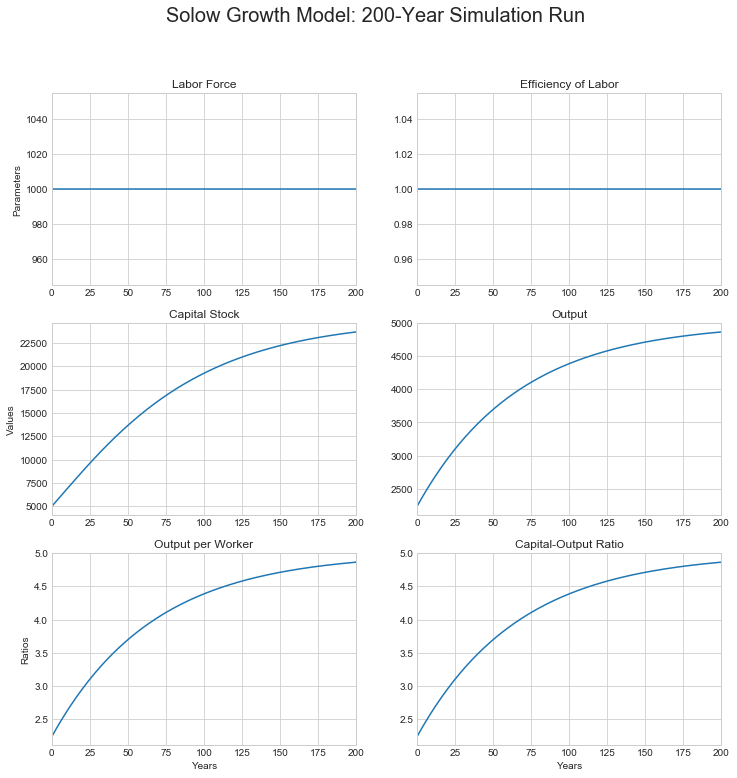

0.0 is the labor force growth rate
0.0 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [10]:
# plot the results

fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(3,2,1)
sg_df.Labor.plot(ax = ax1, title = "Labor Force")
plt.ylabel("Parameters")

ax2 = plt.subplot(3,2,2)
sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

ax3 = plt.subplot(3,2,3)
sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
plt.ylabel("Values")

ax4 = plt.subplot(3,2,4)
sg_df.Output.plot(ax = ax4, title = "Output")

ax5 = plt.subplot(3,2,5)
sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
plt.xlabel("Years")
plt.ylabel("Ratios")

ax6 = plt.subplot(3,2,6)
sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
plt.xlabel("Years")

plt.suptitle('Solow Growth Model: 200-Year Simulation Run', size = 20)

plt.show()

print(n, "is the labor force growth rate")
print(g, "is the efficiency of labor growth rate")
print(delta, "is the depreciation rate")
print(s, "is the savings rate")
print(alpha, "is the decreasing-returns-to-scale parameter")


In [11]:
def sgm_200yr_run(L0, E0, K0, n=0, g=0, s=0.15, alpha=0.5, delta=0.03):

    sg_df = pd.DataFrame(index=range(200),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha *
        (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

    for i in range(200):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha *
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")

    ax2 = plt.subplot(3,2,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

    ax3 = plt.subplot(3,2,3)
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")

    ax4 = plt.subplot(3,2,4)
    sg_df.Output.plot(ax = ax4, title = "Output")

    ax5 = plt.subplot(3,2,5)
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")

    ax6 = plt.subplot(3,2,6)
    sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")

    plt.suptitle('Solow Growth Model: 200-Year Simulation Run', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate")
    print(g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")



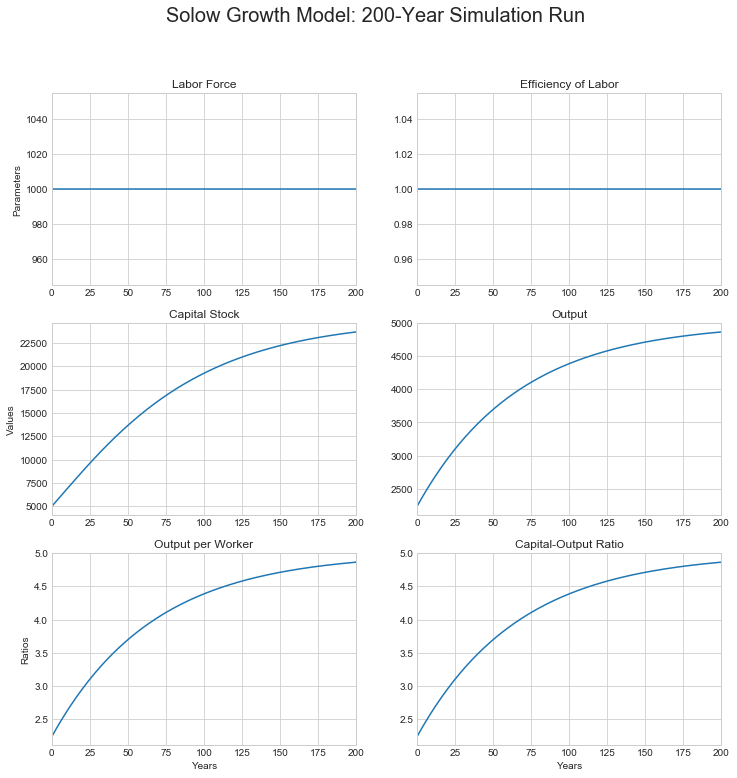

0 is the labor force growth rate
0 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [12]:
sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 5000)

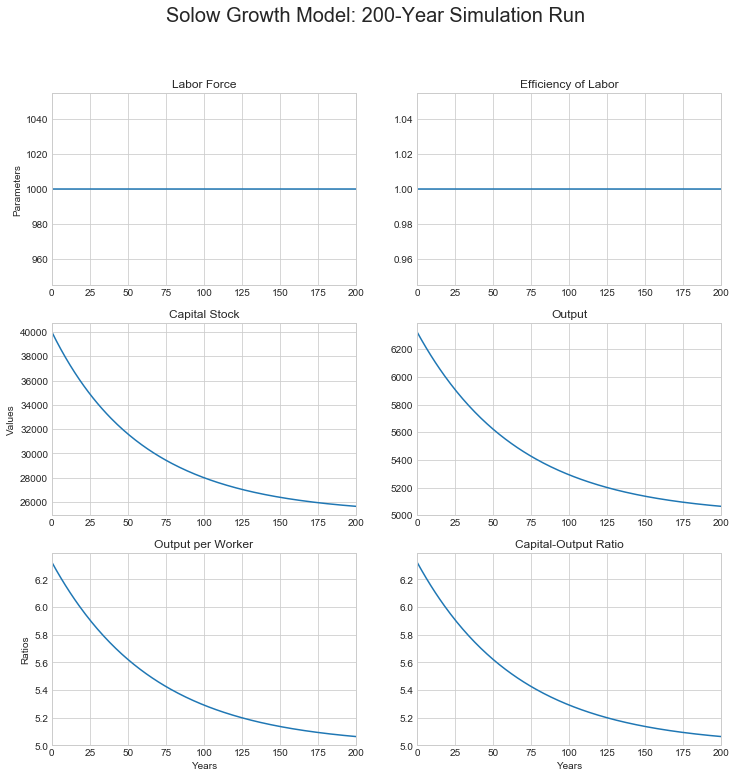

0 is the labor force growth rate
0 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [13]:
sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 40000)

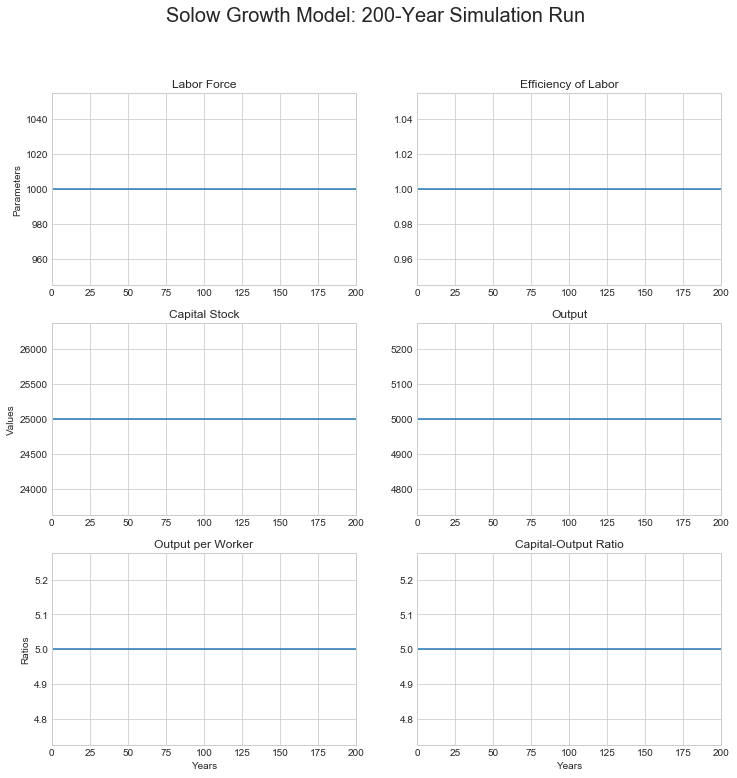

0 is the labor force growth rate
0 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [14]:
sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 25000)

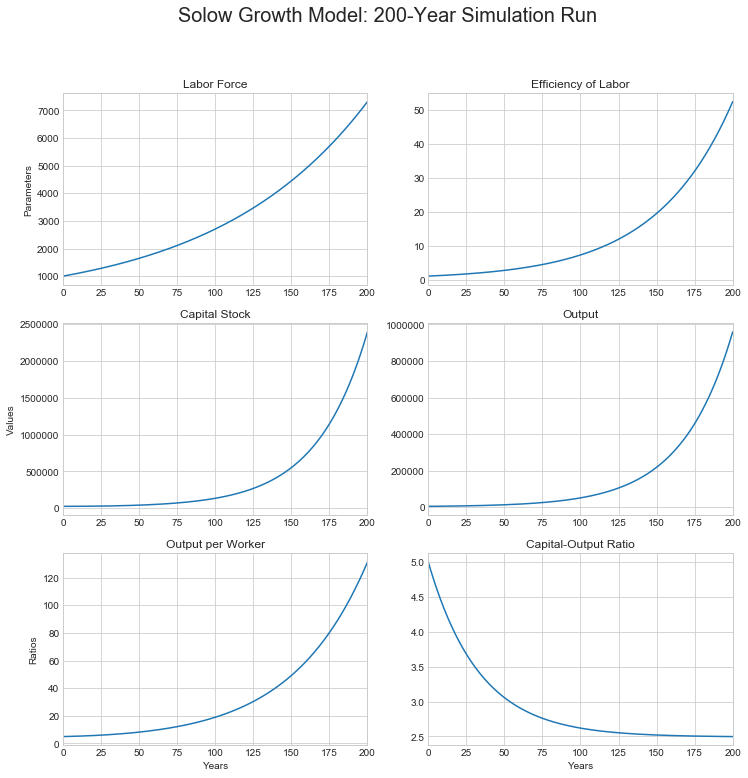

0.01 is the labor force growth rate
0.02 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [15]:
sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 25000, g = 0.02, n = 0.01)





If the capital-output ratio K/Y is lower than s/(n + g + &delta;), then depreciation (&delta;K) plus the amount (n + g)K that capital needs to grow to keep up with growing output will be less than investment (sY), so the capital-output ratio will grow. It will keep growing until K/Y reaches s/(n + g + &delta;). 

If the capital-output ratio K/Y is greater than s/(n + g + &delta;), then depreciation (&delta;K) plus the amount (n + g)K that capital needs to grow to keep up with growing output will be greater than investment (sY), so the capital-output ratio will shrink. It will keep shrinking until K/Y falls to s/(n + g + &delta;). 

In the very long run, the capital-output ratio will be s/(n + g + &delta;). 

The requirement:

(4) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
$\frac{K_{t}}{Y_{t}} =\frac{s}{n+g+\delta}$

What is that equilibrium value of output per worker? We can move back and forth between the capital-per-worker form of the production function that we have already seen:

(1) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
$\frac{Y _{t}}{L _{t}} = \left(\frac{K _{t}}{L _{t}}\right)^{\alpha} \left(L_{t}\right) \left(E_{t}\right)^{1 - \alpha}$

to the capital form that we have already seen obtained by multiplying all the terms in (1) by the labor force:

(2) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
$Y _{t} = {\left({K _{t}}\right)^{\alpha}}{\left(L_{t}E_{t}\right)^{1-\alpha}}$

and to a still different (but more convenient) form: the capital-output ratio form of the production function:

(5) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
$\frac{Y _{t}}{L _{t}} = \left(\frac{K _{t}}{Y _{t}}\right)^{\frac{\alpha}{(1-\alpha)}} \left(E_{t}\right)  $

All forms of the production function contain the same information. But for our purposes the capital-output ratio form is more convenient to work with, so work with it we shall.

What, then, is the equilibrium value of output per worker? We know the value of the diminishing-returns-to-investment parameter a. We know the value of the efficiency of labor E. And we know that in equilibrium K/Y will be equal to s/(n + g + &delta;). So just substitute s/(n + g + &delta;) in for K/Y where it appears, and calculate:

(6)  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
$\frac{Y _{t}}{L _{t}} = \left(\frac{s}{(n + g + \delta)}\right)^{\frac{\alpha}{(1-\alpha)}} \left(E_{t}\right)  $

&nbsp;

----

**Note to Self**: View jupyter notebook from dropbox (or other) links:

* Dropbox: change: "https://www.dropbox.com/" to: "http://nbviewer.jupyter.org/urls/dl.dropbox.com/"; then load the url...
* Else: change: "https://" to "http://nbviewer.jupyter.org/"; then load the url...